Cost after 0 iterations: 0.6931471805599454
Cost after 10000 iterations: 0.6917816533684868
Cost after 20000 iterations: 0.6917808473537225
Cost after 30000 iterations: 0.6917808468585842
Cost after 40000 iterations: 0.6917808468582709
Cost after 50000 iterations: 0.6917808468582707
Cost after 60000 iterations: 0.6917808468582707
Cost after 70000 iterations: 0.6917808468582707
Cost after 80000 iterations: 0.6917808468582706
Cost after 90000 iterations: 0.6917808468582707


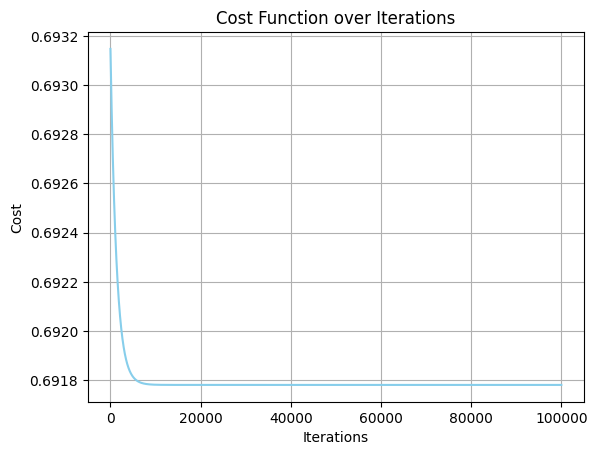

Accuracy of the model: 49.0 %


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
X_train = np.random.randn(1, 500)
Y_train = np.random.randint(2, size=(1, 500))

X_test = np.random.randn(1, 100)
Y_test = np.random.randint(2, size=(1, 100))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def model(X, Y, learning_rate, iterations):
    m = X.shape[1]
    n = X.shape[0]

    W = np.zeros((n, 1))
    B = 0

    cost_list = []

    for i in range(iterations):
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)

        cost = -(1/m) * np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))

        dW = (1/m) * np.dot(A-Y, X.T)
        dB = (1/m) * np.sum(A - Y)

        W = W - learning_rate * dW.T
        B = B - learning_rate * dB

        cost_list.append(cost)

        if i % (iterations/10) == 0:
            print("Cost after", i, "iterations:", cost)

    return W, B, cost_list

iterations = 100000
learning_rate = 0.0015

W, B, cost_list = model(X_train, Y_train, learning_rate=learning_rate, iterations=iterations)

# Plotting cost function
plt.plot(np.arange(iterations), cost_list, color='skyblue')
plt.title('Cost Function over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

def accuracy(X, Y, W, B):
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)

    A = A > 0.5
    A = np.array(A, dtype='int64')

    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100

    print("Accuracy of the model:", round(acc, 2), "%")

accuracy(X_test, Y_test, W, B)